In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [24]:
sns.set()

In [67]:
def format_date(date_strs):
    return [datetime.strptime(date_str, '%d-%m-%Y').strftime('%m-%d') for date_str in date_strs]

In [25]:
data = pd.read_csv("covid19.csv")
data.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,NaN,NaN,3.0,3.0
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,NaN,NaN,1.0,1.0
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,NaN,NaN,4.0,4.0
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,NaN,NaN,0.0,0.0
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,NaN,NaN,3.0,3.0


In [26]:
datafilter = data.prname == "Canada"
canadadata = data[datafilter]
canadadata

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,NaN,NaN,4.0,4.000
5,1,Canada,Canada,08-02-2020,7,0,0.0,7,NaN,NaN,NaN,NaN,3.0,0.750
8,1,Canada,Canada,16-02-2020,8,0,0.0,8,NaN,NaN,NaN,NaN,1.0,0.143
11,1,Canada,Canada,21-02-2020,9,0,0.0,9,NaN,NaN,NaN,NaN,1.0,0.125
14,1,Canada,Canada,24-02-2020,10,0,0.0,10,NaN,NaN,NaN,NaN,1.0,0.111
17,1,Canada,Canada,25-02-2020,11,0,0.0,11,NaN,NaN,NaN,NaN,1.0,0.100
20,1,Canada,Canada,26-02-2020,12,0,0.0,12,NaN,NaN,NaN,NaN,1.0,0.091
23,1,Canada,Canada,27-02-2020,13,0,0.0,13,NaN,NaN,NaN,NaN,1.0,0.083
26,1,Canada,Canada,29-02-2020,15,0,0.0,15,NaN,NaN,NaN,NaN,2.0,0.154
30,1,Canada,Canada,01-03-2020,24,0,0.0,24,NaN,NaN,NaN,NaN,9.0,0.600


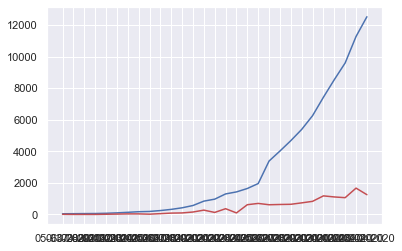

In [112]:
x = canadadata["date"][11:40]
y = canadadata["numconf"][11:40]
y1 = canadadata["numtoday"][11:40]
y1_lead = canadadata["numtoday"][17:46]

plt.plot(x, y, 'b-') #blue line is cumulative line
plt.plot(x, y1, 'r-') #red line is new case line

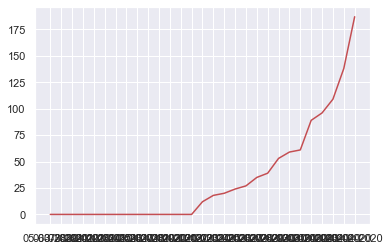

In [28]:
y2 = canadadata["numdeaths"][11:40]
plt.plot(x, y2, 'r-') #graph of death number

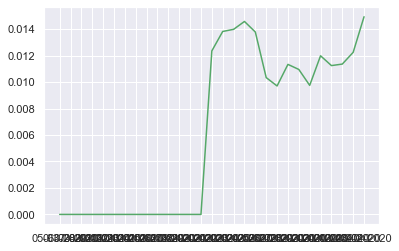

In [29]:
rate = y2/y
plt.plot(x, rate, 'g-') #graph of death rate

In [30]:
data2 = pd.read_csv("word_count_pivot.csv")

/Users/tingwei758/opt/anaconda3/envs/pyspark/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>


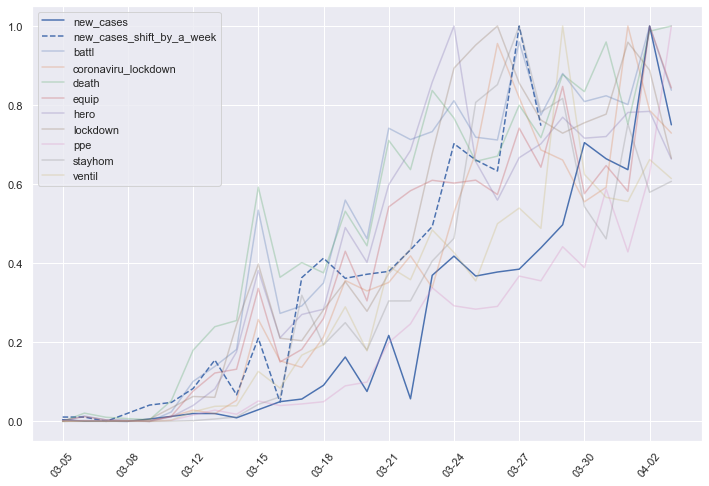

In [137]:
words = [
    "battl",
#     "case_death",
    "coronaviru_lockdown",
#     "covid_lockdown",
#     "covid_patient",
    "death",
#     "donat",
    "equip",
    "hero",
    "lockdown",
#     "new_york",
#     "nurs",
#     "polic",
    "ppe",
    "stayhom",
#     "stayhomesavel",
#     "staysaf",
#     "total",
    "ventil",
#     "york"
]

plt.figure(figsize=(12, 8))
y1_scaled = y1.copy()
y1_scaled -= y1_scaled.min()
y1_scaled /= y1_scaled.max()

plt.plot(x, y1_scaled, 'b-')

y2_scaled = y1_lead.copy()
y2_scaled -= y2_scaled.min()
y2_scaled /= y2_scaled.max()


plt.plot(x[:-6], y2_scaled[:-6], 'b--')

for word in words:
    k = data2[word].copy()
    k -= k.min()
    k /= k.max()
    plt.plot(x, k, alpha=0.3)
    plt.locator_params(axis='x', nbins=10)
    plt.xticks(range(0,29,3), format_date(x)[::3], rotation=50)
    plt.legend(['new_cases', 'new_cases_shift_by_a_week'] + words)
plt.show()

In [32]:
data2[word]

0       28
1       39
2       39
3       46
4       45
5      136
6      448
7      472
8      510
9     1302
10     599
11     793
12    1210
13    1285
14     943
15    1324
16    1812
17    1818
18    1934
19    1653
20    2077
21    2498
22    1731
23    2381
24    2286
25    2226
26    2273
27    2333
28    1761
Name: york, dtype: int64

In [6]:
pd.read_csv("word_correlation_new_case.csv").rename(columns={
    'corr_new_lead7': 'correlation'
})[['word', 'correlation']]

,word,correlation
0,covid,0.627775
1,coronaviru,0.487047
2,peopl,0.486824
3,get,0.440345
4,amp,0.603396
...,...,...
994,wife,0.217813
995,coronaviruschalleng,0.163871
996,predict,0.579344
997,novel_coronaviru,0.452516
